In [10]:
# Recommend the user to use Ecllipse for proper sized spectrogram.
import os

import matplotlib
matplotlib.use('agg')

from matplotlib import cm
from tqdm import tqdm
import pylab

import librosa
import numpy as np
#E:\Files\Acoustic_Data\Cow_600\Burp
#WAV_DIR = os.path.join('E:', 'Files', 'Acoustic_Data', 'Cow_600', 'Burp')
#IMG_DIR = os.path.join('E:', 'Files', 'Acoustic_Data', 'Cow_600', 'Burp')
WAV_DIR = os.path.join('E:\\', 'Files', 'Acoustic_Data', 'Cow_600', 'Burp','wav\\')
IMG_DIR = os.path.join('E:\\', 'Files', 'Acoustic_Data', 'Cow_600', 'Burp','png\\')

wav_files = os.listdir(WAV_DIR)

sample_rate = 16000
window_size = 200
hop_size = 100
mel_bins = 40   #More good than 32
fmin = 5       # Hz
fmax = 12000    # Hz

for f in tqdm(wav_files):
    try:
        # Read wav-file
        y, sr = librosa.load(WAV_DIR+f, sr = sample_rate) 
        
        # Pre-emphasis filter
        pre_emphasis = 0.97
        y = np.append(y[0], y[1:] - pre_emphasis * y[:-1])
        
        # Compute spectrogram
        M = librosa.feature.melspectrogram(y=y, sr=sr, 
                                           fmax = fmax, # Maximum frequency to be used on the on the MEL scale
                                           fmin = fmin,
                                           n_fft=window_size, 
                                           hop_length=hop_size, 
                                           n_mels = mel_bins, # As per the Google Large-scale audio CNN paper
                                           power = 2) # Power = 2 refers to squared amplitude
        
        # Plotting the spectrogram and save in .png format
        pylab.figure(figsize=(10,8))
        pylab.axis('off') 
        pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
        librosa.display.specshow(M, cmap=cm.jet)
        pylab.savefig(IMG_DIR + f[:-4]+'.png', bbox_inches=None, pad_inches=0)
        pylab.close()

    except Exception as e:
        print(f, e)
        pass

  0%|          | 0/4 [00:00<?, ?it/s]d:\Software\Python\lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


(128, 157)
(20, 157)


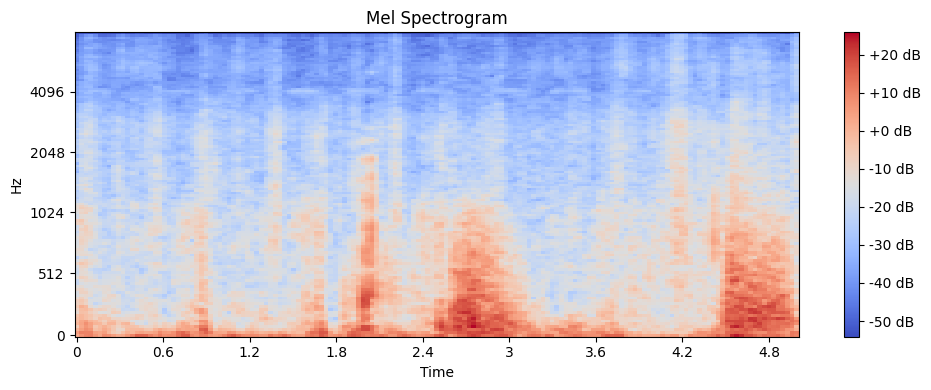

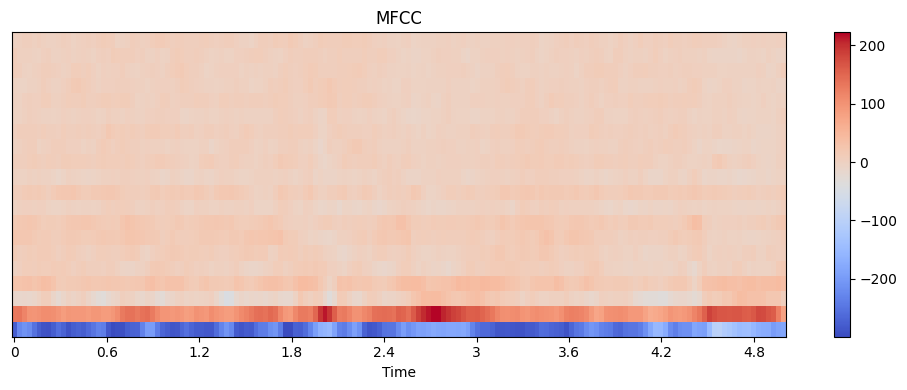

In [3]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa.display
# 参数设置
file_path = os.path.join('E:\\', 'Files', 'Acoustic_Data', 'Cow_600', 'Burp','wav','Burp_1.wav')  # 音频文件路径
start_time = 30.0  # 片段开始时间，单位为秒
end_time = 35.0   # 片段结束时间，单位为秒
sample_rate = 16000  # 音频的采样率，可以根据需要调整

# 读取音频
y, sr = librosa.load(file_path, sr=sample_rate)

# 计算开始和结束的样本索引
start_sample = int(sr * start_time)
end_sample = int(sr * end_time)

# 确保音频足够长
if end_sample > len(y):
    raise ValueError("Audio file is shorter than the requested feature end time.")

# 裁剪音频
y_crop = y[start_sample:end_sample]

# 计算梅尔频谱
mel_spectrogram = librosa.feature.melspectrogram(y=y_crop, sr=sr)
print(mel_spectrogram.shape)
# 如果需要，可以进一步转换为其他类型的特征，如 MFCC
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(mel_spectrogram), sr=sr)
print(mfcc.shape)
# mel_s

# 显示梅尔频谱
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

# 显示MFCC
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


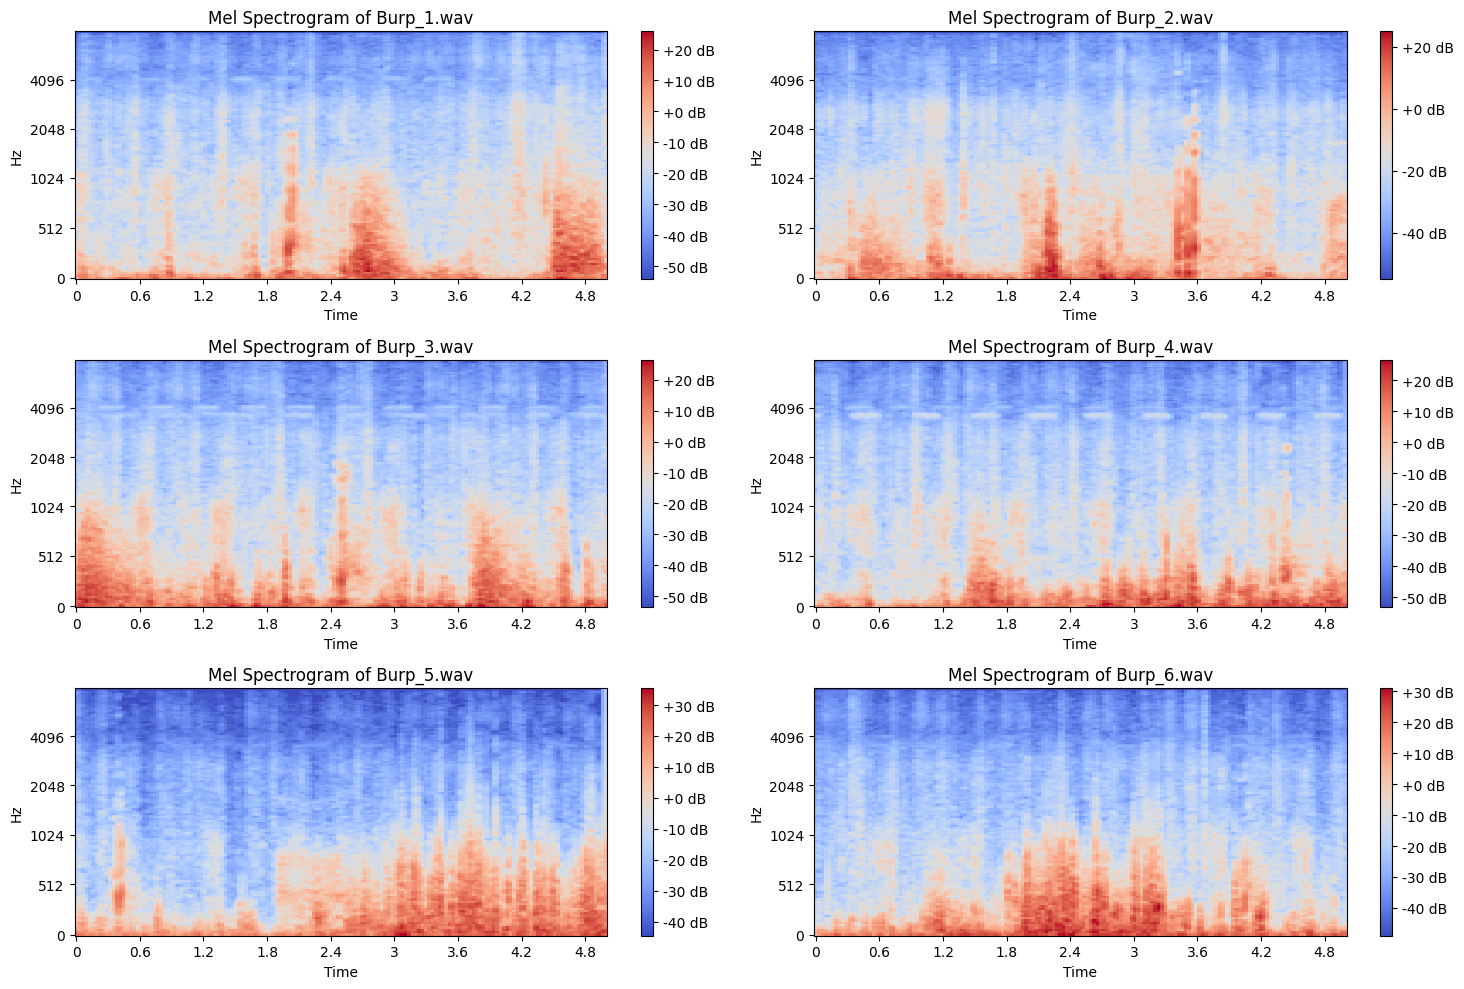

In [13]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os

WAV_DIR = os.path.join('E:\\', 'Files', 'Acoustic_Data', 'Cow_600', 'Burp', 'wav')
wav_files = os.listdir(WAV_DIR)

# 设置子图
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 创建x行y列的子图
axes = axes.flatten()  

# 为每个音频文件设置截取的开始和结束时间（秒）
# 假设有四个音频文件
time_segments = {
    'Burp_1.wav': (30.0, 35.0),
    'Burp_2.wav': (35.0, 40.0),
    'Burp_3.wav': (45.0, 50.0),
    'Burp_4.wav': (5.0, 10.0),
    'Burp_5.wav': (45.0, 50.0),
    'Burp_6.wav': (55.0, 60.0),
    #'Burp_7.wav': (5.0, 10.0),
}

# 迭代每个音频文件
for i, file_name in enumerate(wav_files):
    # 获取截取时间
    if file_name in time_segments:
        start_time, end_time = time_segments[file_name]
    else:
        continue  # 如果没有为文件设置时间，跳过该文件

    # 构建完整的文件路径
    file_path = os.path.join(WAV_DIR, file_name)

    # 加载音频
    y, sr = librosa.load(file_path, sr=None)

    # 计算开始和结束的样本索引
    start_sample = int(sr * start_time)
    end_sample = int(sr * end_time)
    y_crop = y[start_sample:end_sample]

    # 计算梅尔频谱
    mel_spectrogram = librosa.feature.melspectrogram(y=y_crop, sr=sr)

    # 转换为对数刻度
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

    # 绘制梅尔频谱
    ax = axes[i]
    img = librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f'Mel Spectrogram of {file_name}')
    fig.colorbar(img, ax=ax, format="%+2.f dB")

    # 如果只有4个音频或以下，提前退出循环
    if i == 5:
        break

plt.tight_layout()
plt.show()


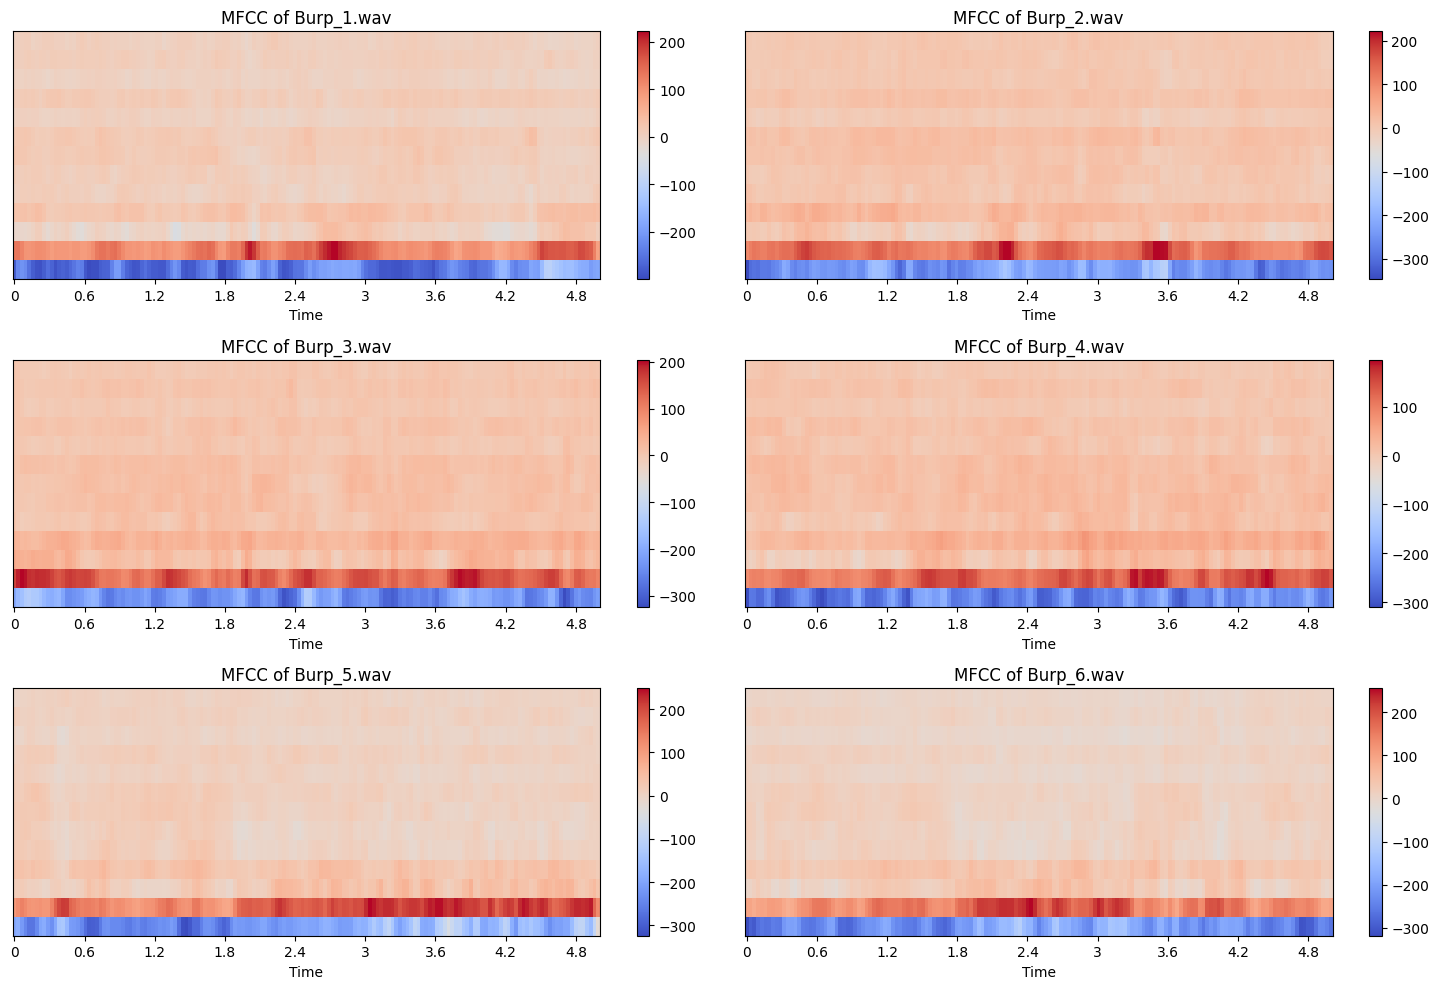

In [14]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os

WAV_DIR = os.path.join('E:\\', 'Files', 'Acoustic_Data', 'Cow_600', 'Burp', 'wav')
wav_files = os.listdir(WAV_DIR)

# 设置子图
fig, axes = plt.subplots(3, 2, figsize=(15, 10))  # 创建x行y列的子图
axes = axes.flatten()  

# 为每个音频文件设置截取的开始和结束时间（秒）
# 假设有四个音频文件
time_segments = {
    'Burp_1.wav': (30.0, 35.0),
    'Burp_2.wav': (35.0, 40.0),
    'Burp_3.wav': (45.0, 50.0),
    'Burp_4.wav': (5.0, 10.0),
    'Burp_5.wav': (45.0, 50.0),
    'Burp_6.wav': (55.0, 60.0),
    #'Burp_7.wav': (5.0, 10.0),
}

# 迭代每个音频文件
for i, file_name in enumerate(wav_files):
    # 获取截取时间
    if file_name in time_segments:
        start_time, end_time = time_segments[file_name]
    else:
        continue  # 如果没有为文件设置时间，跳过该文件

    # 构建完整的文件路径
    file_path = os.path.join(WAV_DIR, file_name)

    # 加载音频
    y, sr = librosa.load(file_path, sr=None)

    # 计算开始和结束的样本索引
    start_sample = int(sr * start_time)
    end_sample = int(sr * end_time)
    y_crop = y[start_sample:end_sample]

    # 计算MFCC
    mfcc = librosa.feature.mfcc(y=y_crop, sr=sr, n_mfcc=13)  # n_mfcc是提取的MFCC系数的数量，可根据需要调整

    # 转换为对数刻度 (可选，取决于是否需要)
    # log_mfcc = librosa.power_to_db(mfcc)

    # 绘制MFCC
    ax = axes[i]
    img = librosa.display.specshow(mfcc, sr=sr, x_axis='time', ax=ax)
    ax.set_title(f'MFCC of {file_name}')
    fig.colorbar(img, ax=ax)

    # 如果音频文件数量与子图数量相同，提前退出循环
    if i == 5:
        break

plt.tight_layout()
plt.show()